In [7]:
import numpy as np

def epsilon_greedy(T, RewardVector, eps):
    # Implements epsilon greedy algorithm for multi-armed bandit
    K = len(RewardVector)  # number of bandits
    Return = 0
    AvgReturn = np.zeros(T)
    Q = np.zeros(K)
    N = np.zeros(K)
    RV = RewardVector

    for t in range(1, T + 1):
        u = np.random.rand()
        if u < eps:
            A = np.random.randint(0, K)
        else:
            M = np.max(Q)
            MaxInd = np.where(Q == M)[0]
            if len(MaxInd) > 1:
                I = np.random.randint(0, len(MaxInd))
                A = MaxInd[I]
            else:
                A = MaxInd[0]

        Reward = np.random.randn() + RV[A]
        Return += Reward
        N[A] = N[A]+1
        Q[A] = Q[A] + (1 / N[A]) * (Reward - Q[A])
        AvgReturn[t - 1] = Return / t

    return AvgReturn





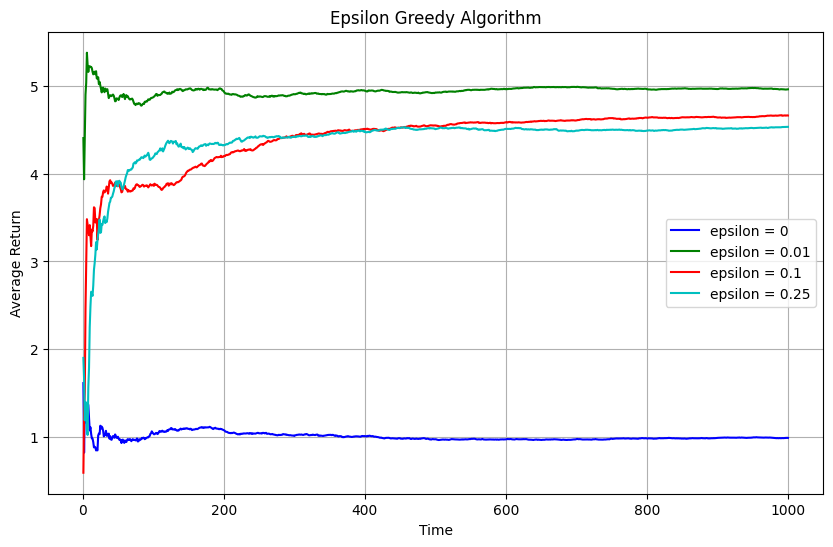

In [13]:
import matplotlib.pyplot as plt
T = 1000
RewardVector = [1, 2, 3, 4, 5]  # Replace with your own reward vector
epsilons = [0, 0.01, 0.1, 0.25]
colors = ['b', 'g', 'r', 'c']

plt.figure(figsize=(10, 6))

for eps, color in zip(epsilons, colors):
    AvgReturn = epsilon_greedy(T, RewardVector, eps)
    plt.plot(range(1, T + 1), AvgReturn, label=f'epsilon = {eps}', color=color)

plt.xlabel('Time')
plt.ylabel('Average Return')
plt.title('Epsilon Greedy Algorithm')
plt.legend()
plt.grid(True)
plt.show()


